In [ ]:
# data_metadata_isolation.ipynb

# セル1: ライブラリのインポート
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
# セル2: CSVファイルの読み込み（パスは適宜変更）
df = pd.read_csv('../data/balanced_random_40K_test3.csv')
# 셀3: head_elements 열의 데이터를 구문 분석하고 정리
def extract_head_info(head_elements_str):
    try:
        elements = ast.literal_eval(head_elements_str)
        tag_counts = {}
        title_text = ""
        meta_description = None
        og_title = None
        og_image = None
        script_srcs = []
        link_stylesheets = []

        for tag in elements:
            tag_name = tag.get("tag")
            attrs = tag.get("attributes", {})
            if tag_name:
                tag_counts[tag_name] = tag_counts.get(tag_name, 0) + 1
            if tag_name == "title":
                title_text = tag.get("text", "")
            if tag_name == "meta":
                if attrs.get("name") == "description":
                    meta_description = attrs.get("content", None)
                if attrs.get("property") == "og:title":
                    og_title = attrs.get("content", None)
                if attrs.get("property") == "og:image":
                    og_image = attrs.get("content", None)
            if tag_name == "script" and "src" in attrs:
                script_srcs.append(attrs["src"])
            if tag_name == "link" and attrs.get("rel") == "stylesheet":
                link_stylesheets.append(attrs.get("href", ""))
        
        return {
            "meta_count": tag_counts.get("meta", 0),
            "link_count": tag_counts.get("link", 0),
            "script_count": tag_counts.get("script", 0),
            "title_count": tag_counts.get("title", 0),
            "title_text": title_text,
            "meta_description": meta_description,
            "og_title": og_title,
            "og_image": og_image,
            "script_srcs": script_srcs,
            "link_stylesheets": link_stylesheets,
        }
    except Exception:
        return {
            "meta_count": 0,
            "link_count": 0,
            "script_count": 0,
            "title_count": 0,
            "title_text": "",
            "meta_description": None,
            "og_title": None,
            "og_image": None,
            "script_srcs": [],
            "link_stylesheets": [],
        }
# 셀4: 정리 결과를 DataFrame으로 변환하여 결합
parsed_df = df["head_elements"].dropna().apply(extract_head_info).apply(pd.Series)
df = pd.concat([df, parsed_df], axis=1)
# 셀5: 처음 몇 줄 표시
df.head()

KeyError: "['title_text', 'meta_description', 'og_title', 'og_image', 'link_stylesheets'] not in index"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1. 데이터 불러오기
df = pd.read_csv('../data/balanced_random_40K_test3.csv')

# 2. 분석 대상 필드
fields = ['title_text', 'meta_description', 'og_title', 'og_image', 'link_stylesheets']
df = df[fields + ['type']].dropna()

# 3. 텍스트 병합 및 전처리 (모든 필드를 하나로 합침)
df['combined_text'] = df[fields].astype(str).agg(' '.join, axis=1)

# 4. 단어 분리 및 벡터화
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['combined_text'])
y = df['type']

# 5. WordCloud 시각화 - 전체 필드 기준 상위 단어
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud from combined fields')
plt.tight_layout()
plt.show()

# 6. Feature Importance 분석 (랜덤 포레스트 사용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. 중요 단어 확인
importances = model.feature_importances_
keywords = vectorizer.get_feature_names_out()
important_words = pd.DataFrame({'word': keywords, 'importance': importances})
important_words = important_words.sort_values(by='importance', ascending=False).head(20)

# 8. 중요 단어 시각화
plt.figure(figsize=(10, 6))
plt.barh(important_words['word'][::-1], important_words['importance'][::-1])
plt.title('Top 20 Important Words (Feature Importance)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


C:\Users\gkswl\AppData\Local\Temp\ipykernel_14320\3507288090.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_words, x='tfidf_score', y='word', palette=color)


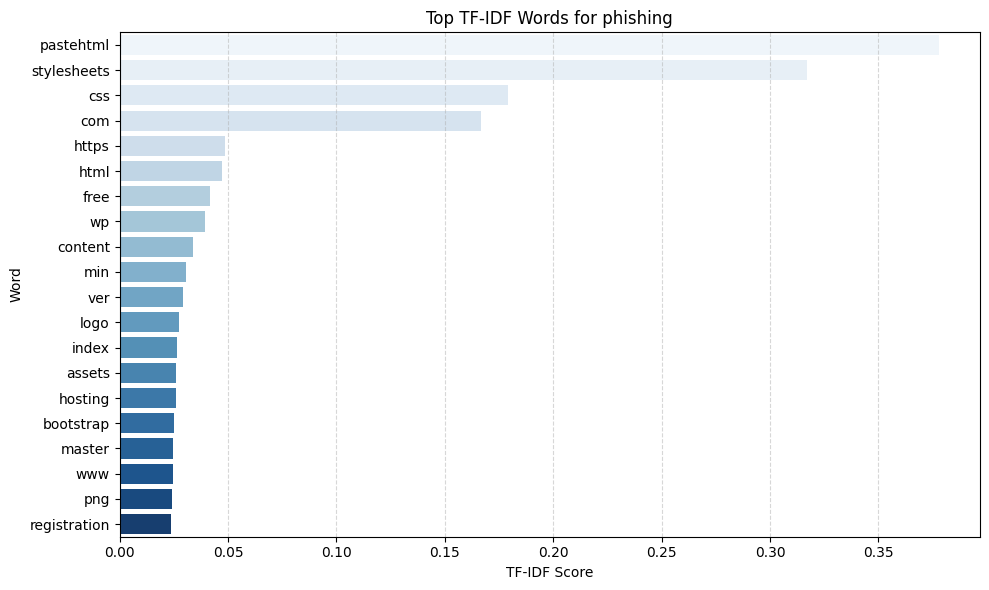

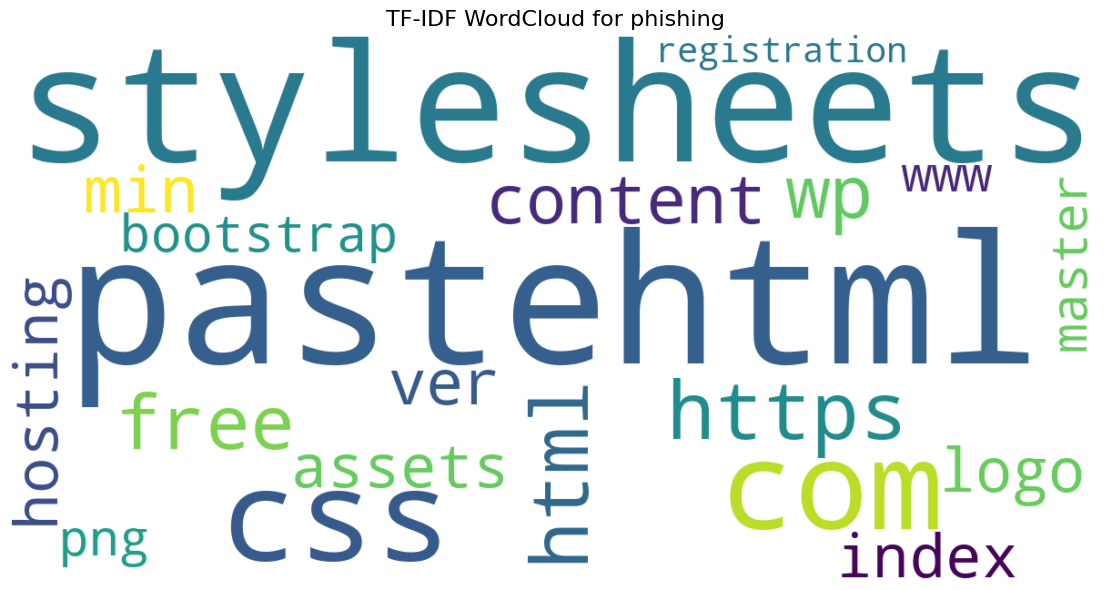

C:\Users\gkswl\AppData\Local\Temp\ipykernel_14320\3507288090.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_words, x='tfidf_score', y='word', palette=color)


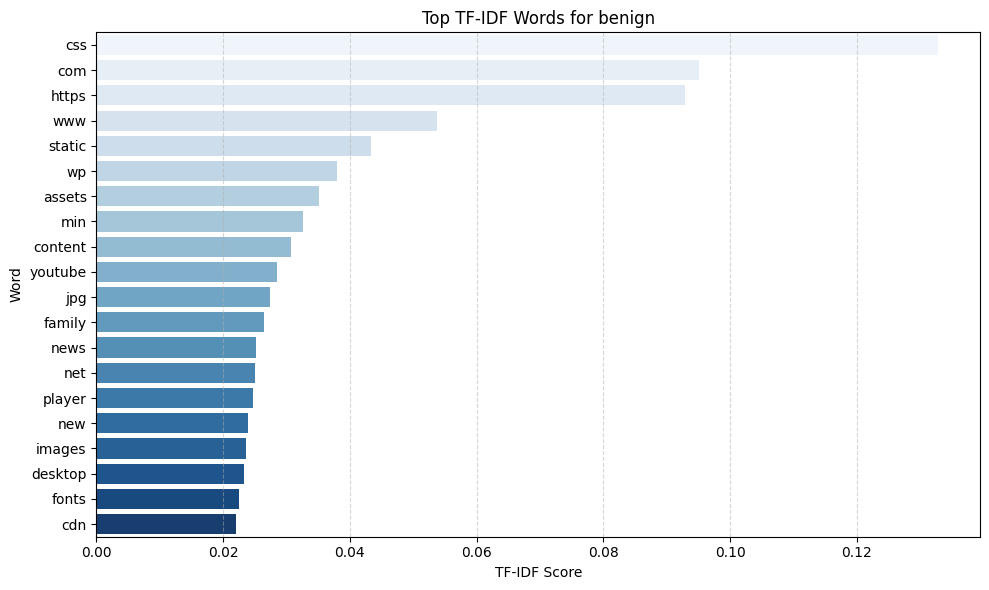

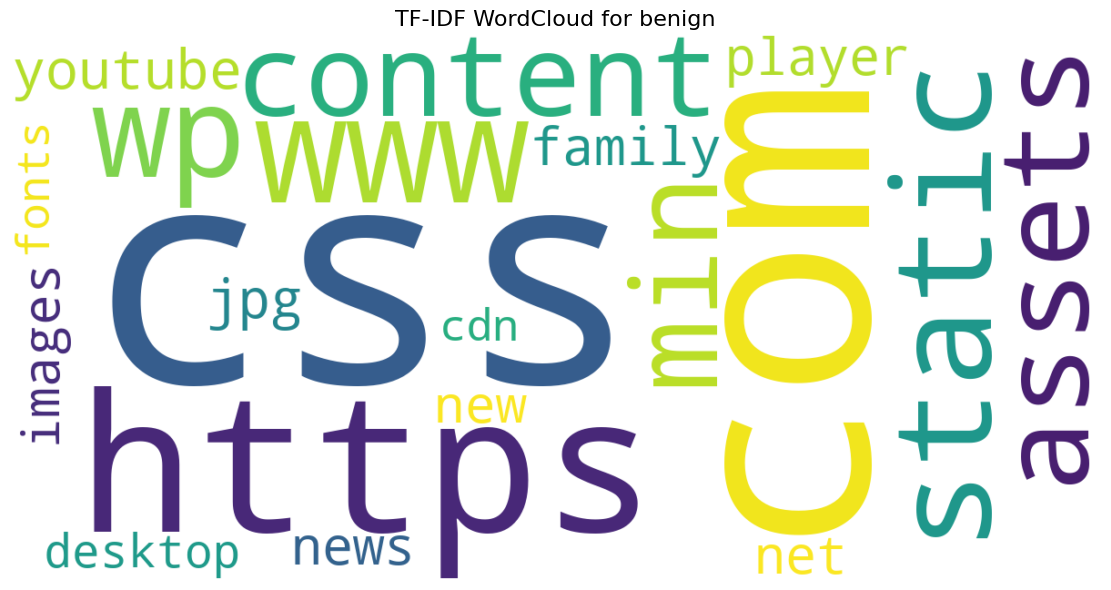

C:\Users\gkswl\AppData\Local\Temp\ipykernel_14320\3507288090.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_words, x='tfidf_score', y='word', palette=color)


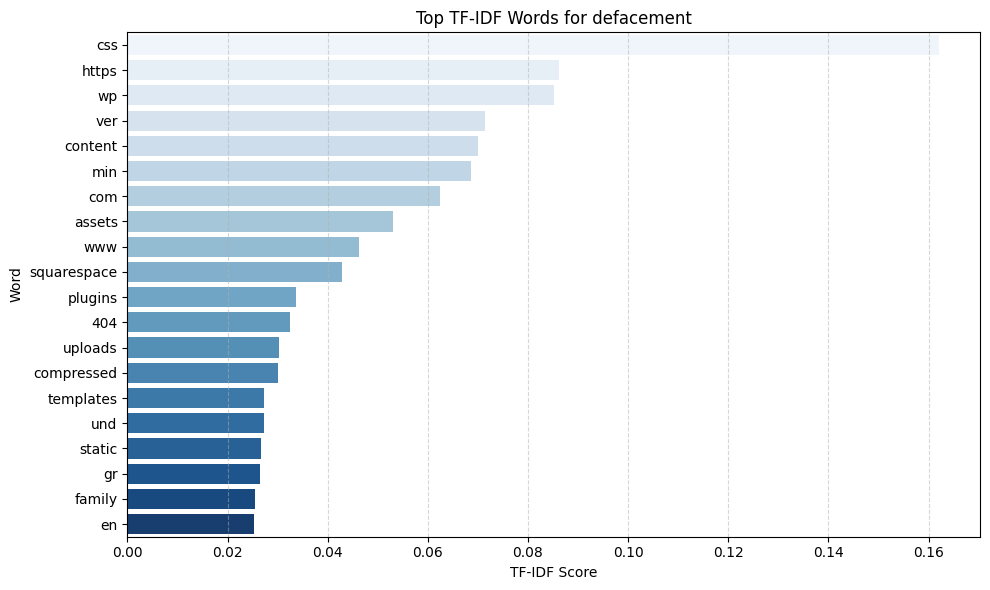

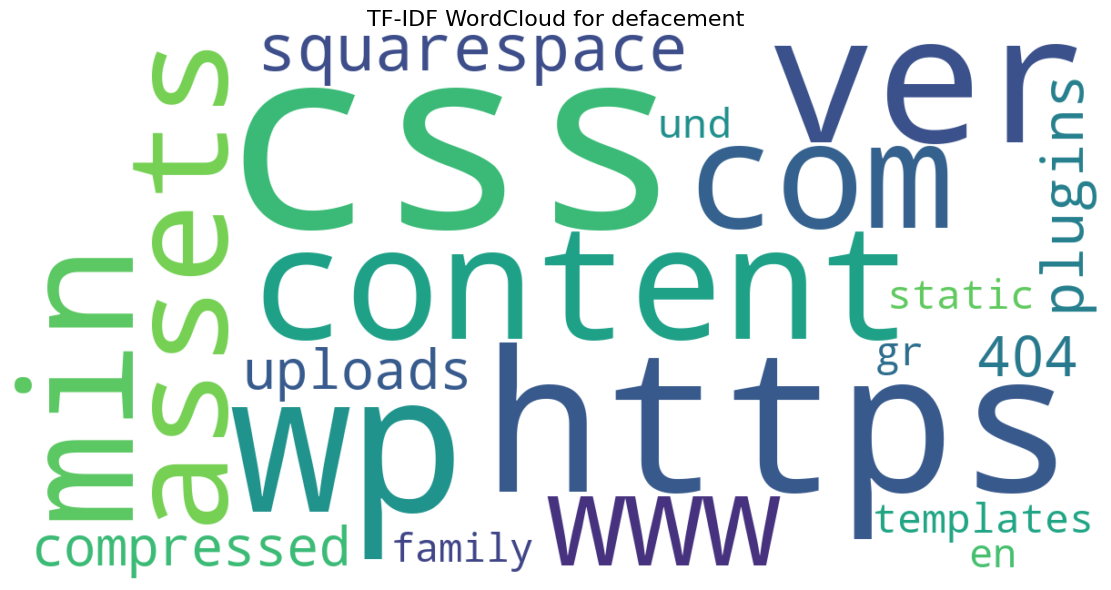

C:\Users\gkswl\AppData\Local\Temp\ipykernel_14320\3507288090.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_words, x='tfidf_score', y='word', palette=color)


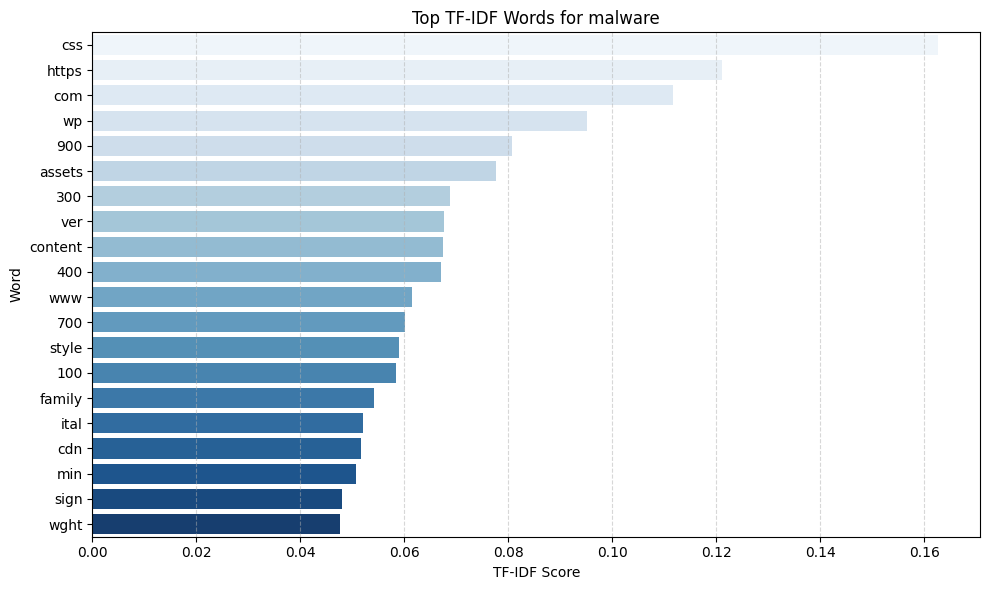

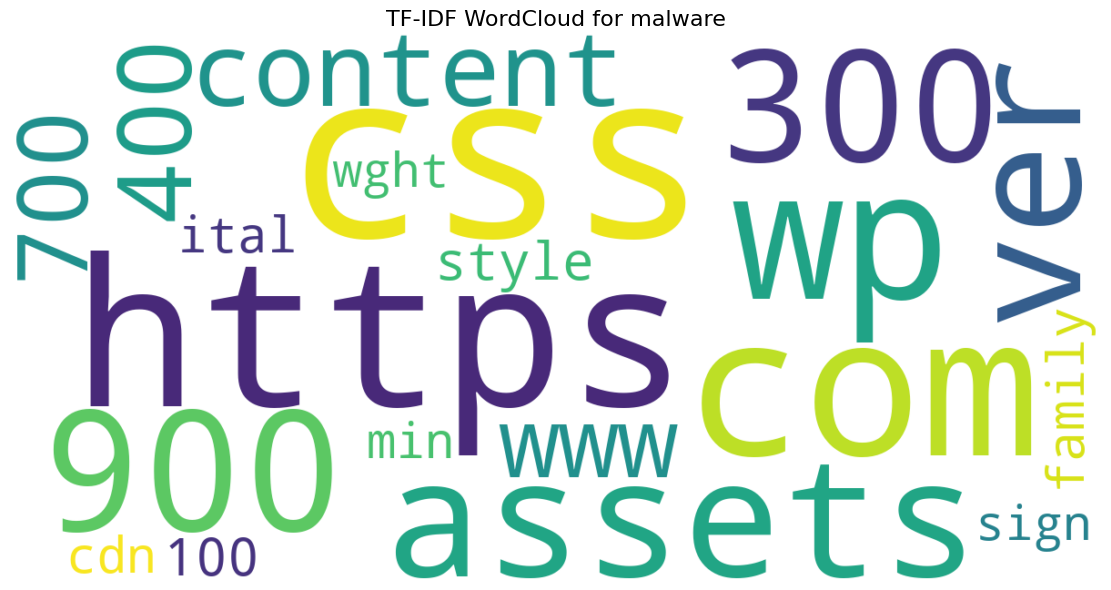

In [2]:
# 📦 라이브러리 임포트
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# 📁 CSV 파일 불러오기
df = pd.read_csv('../data/balanced_random_40K_test3.csv')

# 🧠 head_elements 파싱 함수 정의
def extract_head_info(head_elements_str):
    try:
        elements = ast.literal_eval(head_elements_str)
        tag_counts = {}
        title_text = ""
        meta_description = None
        og_title = None
        og_image = None
        script_srcs = []
        link_stylesheets = []

        for tag in elements:
            tag_name = tag.get("tag")
            attrs = tag.get("attributes", {})
            if tag_name:
                tag_counts[tag_name] = tag_counts.get(tag_name, 0) + 1
            if tag_name == "title":
                title_text = tag.get("text", "")
            if tag_name == "meta":
                if attrs.get("name") == "description":
                    meta_description = attrs.get("content", None)
                if attrs.get("property") == "og:title":
                    og_title = attrs.get("content", None)
                if attrs.get("property") == "og:image":
                    og_image = attrs.get("content", None)
            if tag_name == "script" and "src" in attrs:
                script_srcs.append(attrs["src"])
            if tag_name == "link" and attrs.get("rel") == "stylesheet":
                link_stylesheets.append(attrs.get("href", ""))

        return {
            "meta_count": tag_counts.get("meta", 0),
            "link_count": tag_counts.get("link", 0),
            "script_count": tag_counts.get("script", 0),
            "title_count": tag_counts.get("title", 0),
            "title_text": title_text,
            "meta_description": meta_description,
            "og_title": og_title,
            "og_image": og_image,
            "script_srcs": script_srcs,
            "link_stylesheets": link_stylesheets,
        }
    except Exception:
        return {
            "meta_count": 0,
            "link_count": 0,
            "script_count": 0,
            "title_count": 0,
            "title_text": "",
            "meta_description": None,
            "og_title": None,
            "og_image": None,
            "script_srcs": [],
            "link_stylesheets": [],
        }

# 🧼 head_elements 열 파싱 및 병합
parsed_df = df["head_elements"].dropna().apply(extract_head_info).apply(pd.Series)
df = pd.concat([df, parsed_df], axis=1)

# ✂️ 분석 대상 필드 설정 및 병합
fields = ['title_text', 'meta_description', 'og_title', 'og_image', 'link_stylesheets']
df = df[fields + ['type']].dropna()
df['combined_text'] = df[fields].astype(str).agg(' '.join, axis=1)

# 🔤 TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
vectorizer.fit(df['combined_text'])
feature_names = vectorizer.get_feature_names_out()

# 🎨 막대그래프 시각화 함수
def plot_top_words(df_words, title, color):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_words, x='tfidf_score', y='word', palette=color)
    plt.title(title)
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Word')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# ☁️ 워드클라우드 시각화 함수
def show_wordcloud(word_score_dict, title):
    wordcloud = WordCloud(width=1200, height=600, background_color='white')
    wordcloud.generate_from_frequencies(word_score_dict)

    plt.figure(figsize=(14, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# 🎯 TYPE별 분석 및 시각화 (막대 + 워드클라우드)
type_colors = {
    'Phishing': 'Reds_r',
    'Malware': 'Purples_r',
    'Defacement': 'Oranges_r',
    'Benign': 'Greens_r'
}

for label in df['type'].unique():
    subset = df[df['type'] == label]
    X_tfidf = vectorizer.transform(subset['combined_text'])
    tfidf_mean = X_tfidf.mean(axis=0).A1

    # 상위 TF-IDF 단어 추출
    top_indices = tfidf_mean.argsort()[::-1][:20]
    top_words = [(feature_names[i], tfidf_mean[i]) for i in top_indices]
    top_df = pd.DataFrame(top_words, columns=['word', 'tfidf_score'])

    # 막대 차트 시각화
    plot_top_words(top_df, f"Top TF-IDF Words for {label}", type_colors.get(label, 'Blues'))

    # 워드클라우드 시각화
    tfidf_dict = dict(top_words)
    show_wordcloud(tfidf_dict, f"TF-IDF WordCloud for {label}")
